## import package

In [1]:
import nextbike

## Read in raw data

In [2]:
dfRaw = nextbike.io.read_file()
dfWeather = nextbike.io.getWeatherData()
dfRawData = nextbike.io.preprocessData(dfRaw)  

In [3]:
#Station data
stationData = nextbike.io.preprocessStationData(dfRaw)
dfBikesPerStationIndex = nextbike.io.createBikeNumberPerStationIndex(stationData)
dfBikesPerStationIndex.head()

,5140,5141,5142,5143,5144,5145,5146,5147,5150,5151,...,5168,5169,5171,5172,5173,5174,5175,5176,5177,5178
datetime,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-01-01 00:01:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-01-01 00:02:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-01-01 00:03:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-01-01 00:04:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
dfTripsRaw = nextbike.io.createTrips(dfRawData)
dfTrips = nextbike.io.drop_outliers(dfTripsRaw)
dfTrips = nextbike.postalCodes.assignPostalCode(dfTrips)
dfTrips = nextbike.postalCodes.filterForPostalCodes(dfTrips)
dfTrips.head()

,bNumber,sTime,eTime,duration,sLong,sLat,eLong,eLat,weekend,bType,sPlaceNumber,ePlaceNumber,durationInSec,sPostalCode,ePostalCode
0,11169,2019-01-20 01:55:00,2019-01-20 02:06:00,00:11:00,8.763266,50.795224,8.770358,50.804522,True,15,5173,5159,660,35039,35037
2,11169,2019-01-20 11:58:00,2019-01-20 12:06:00,00:08:00,8.770358,50.804522,8.759248,50.804725,True,15,5159,5178,480,35037,35037
3,11169,2019-01-20 15:12:00,2019-01-20 15:27:00,00:15:00,8.759248,50.804725,8.774681,50.822927,True,15,5178,5150,900,35037,35039
4,11169,2019-01-20 15:39:00,2019-01-20 15:42:00,00:03:00,8.774681,50.822927,8.774681,50.822927,True,15,5150,5150,180,35039,35039
5,11270,2019-01-20 00:25:00,2019-01-20 00:37:00,00:12:00,8.775948,50.813203,8.775948,50.813203,True,15,5156,5156,720,35037,35037


In [5]:
dfStations = nextbike.io.createStations(dfRawData)
dfStations.head()

,pName,pLat,pLong
pNumber,,,
0,no fixed station,NaN,NaN
5140,Anatomie,50.816058,8.772242
5141,Ketzerbach/Zwischenhausen,50.813950,8.766160
5142,Friedrichplatz,50.803270,8.764060
5143,Interkulturelle Gaerten/ Am Richtsberg,50.794700,8.772230


In [6]:
dfTripsPerDay = nextbike.io.createTripsPerDay(dfTrips,dfWeather)
dfTripsPerDay.head()

,date,tripsPerDay,temperatureMAX,temperatureAVG,temperatureMIN,precipitationAVG,day,month,dayOfWeek
0,2019-01-20,843,1.5,-7.373611,-11.6,0.000000,20,1,6
1,2019-01-21,1182,-0.7,-8.700694,-12.9,0.000000,21,1,0
2,2019-01-22,1038,-3.2,-5.825694,-12.3,0.000000,22,1,1
3,2019-01-23,1221,-1.7,-3.445139,-5.9,0.000000,23,1,2
4,2019-01-24,1458,-2.5,-4.198611,-5.2,0.001111,24,1,3


## save data to csv files
### (belongs to task 1c)

In [7]:
nextbike.io.save_Weather(dfWeather)
nextbike.io.save_tripData(dfTrips)
nextbike.io.save_StationData(dfStations)
nextbike.io.save_dfBikesPerStationIndexs(dfBikesPerStationIndex)
nextbike.io.save_tripsPerDay(dfTripsPerDay)

# 2. Visualization

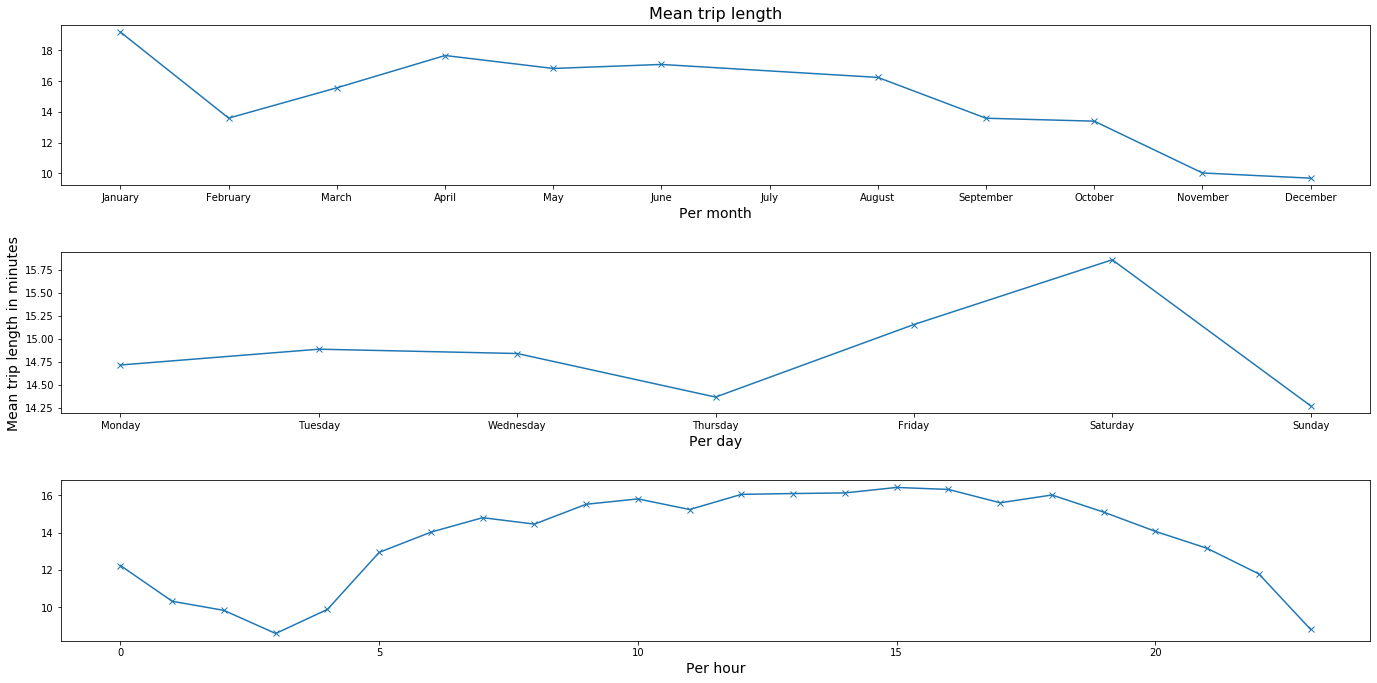

In [8]:
nextbike.visualization.visualizeMeanTripLength(dfTrips).show()

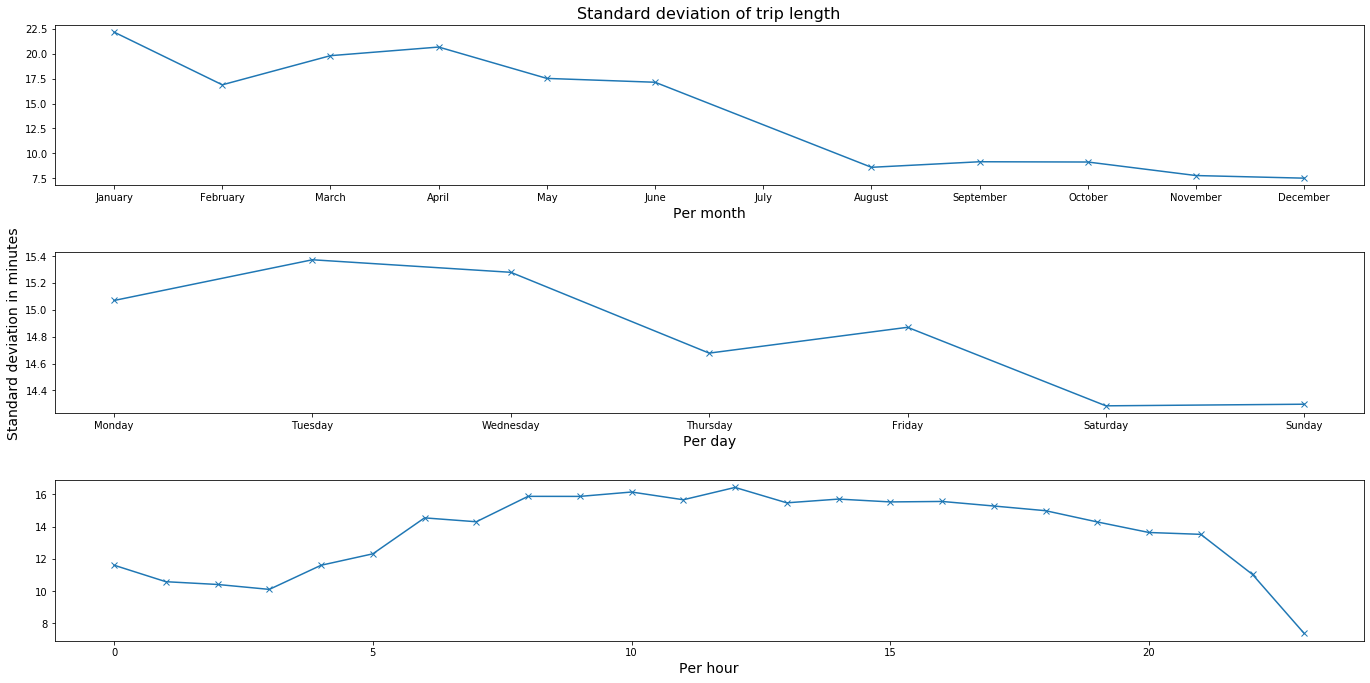

In [9]:
 nextbike.visualization.visualizeStdTripLength(dfTrips).show()

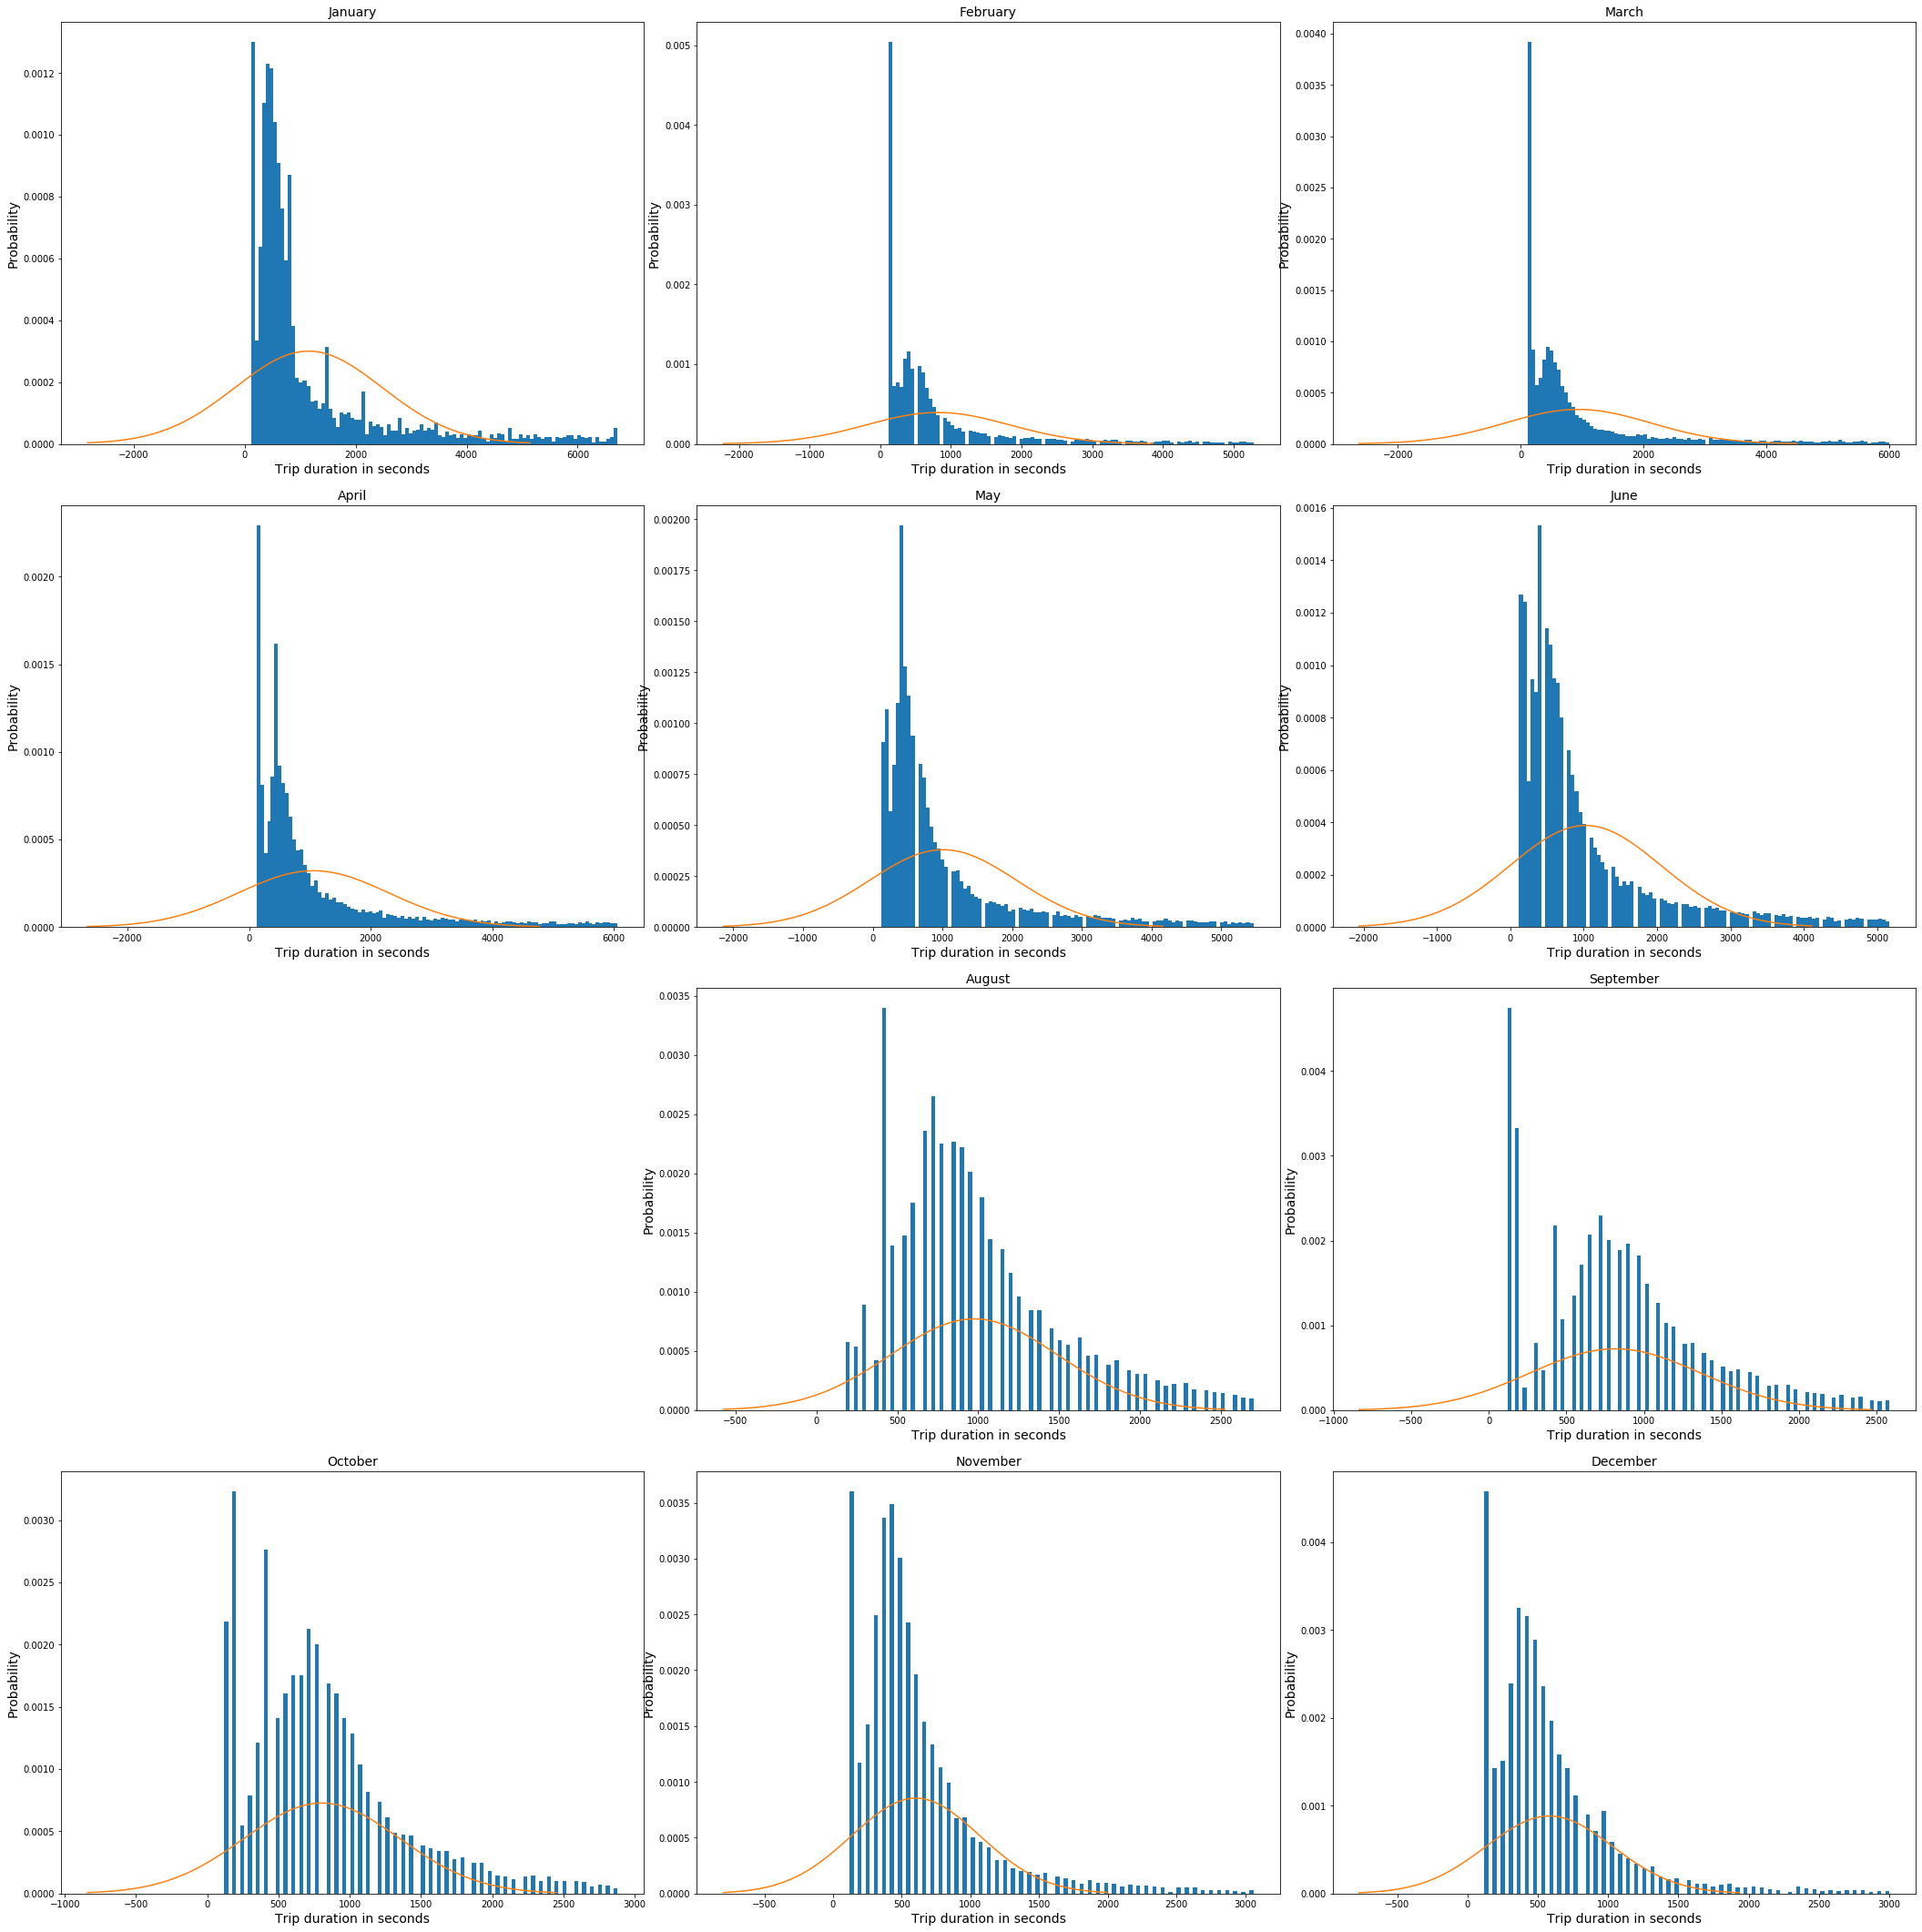

In [10]:
nextbike.visualization.visualizeDistributionOfTripsPerMonth(dfTrips).show()

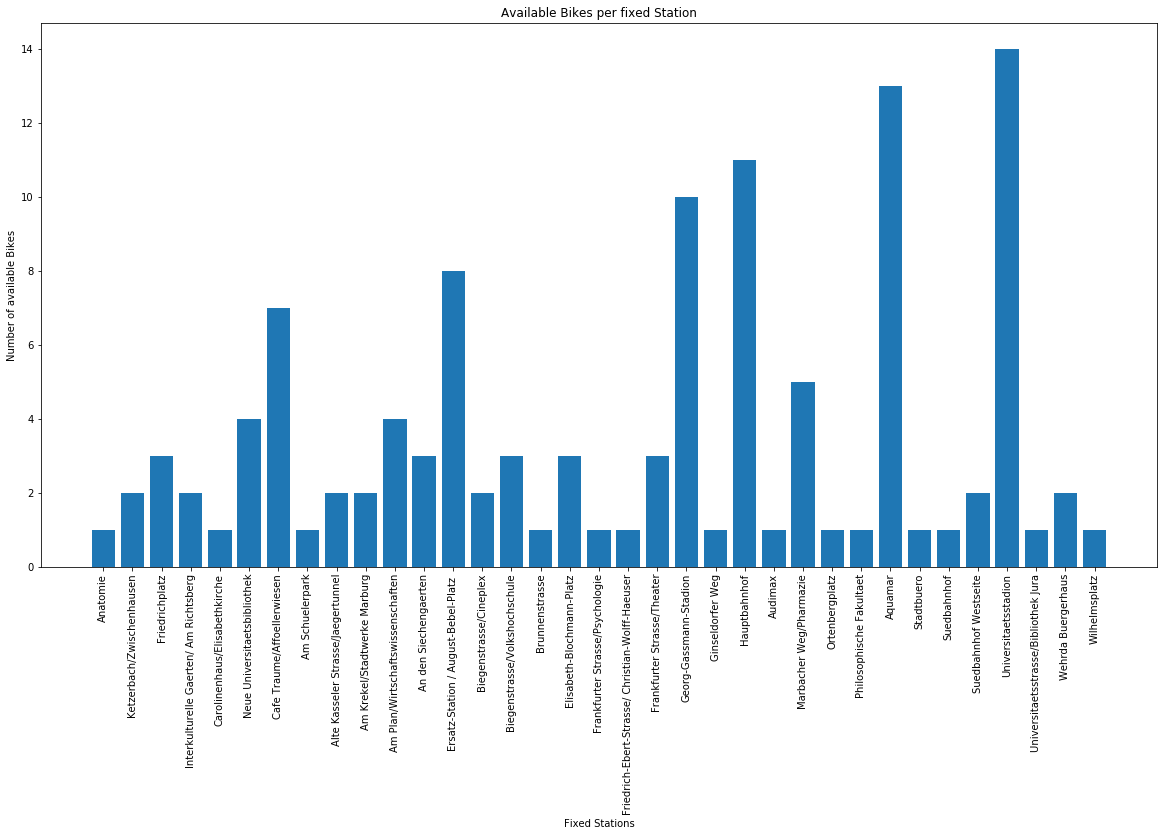

In [12]:
nextbike.visualization.visualizeNumberOfBikesPerStationBarplot('2019-08-20 19:00:00', dfStations, dfBikesPerStationIndex)

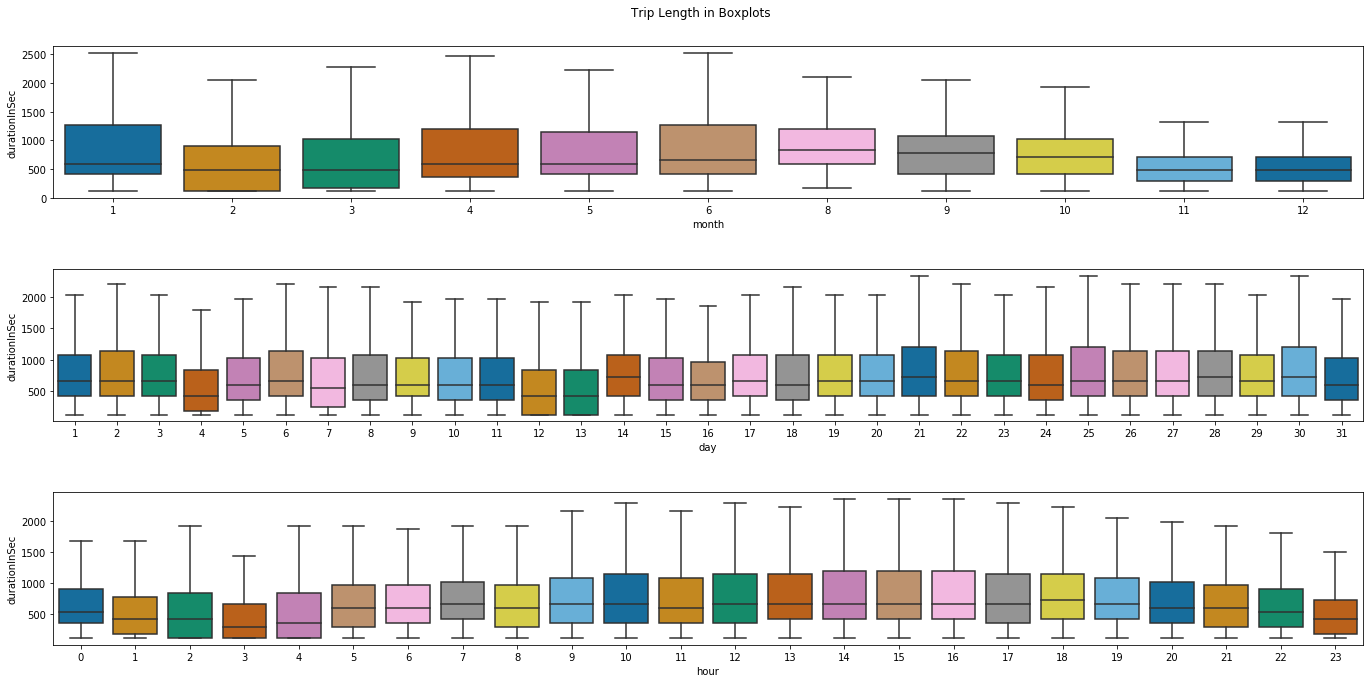

<module 'seaborn' from 'D:\\Conda\\new\\lib\\site-packages\\seaborn\\__init__.py'>

In [13]:
nextbike.visualization.visualizeTripLengthBoxplots(dfTrips)

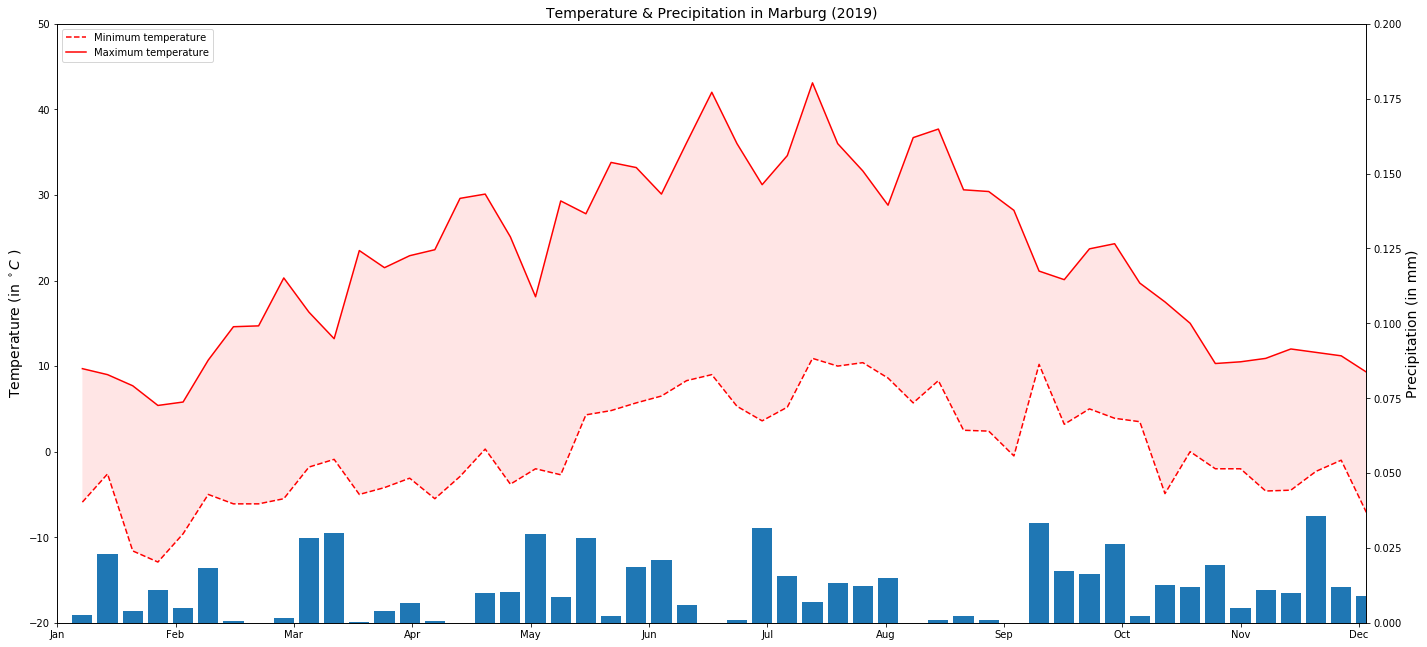

In [14]:
nextbike.visualization.visualizeWeatherData(dfWeather).show()

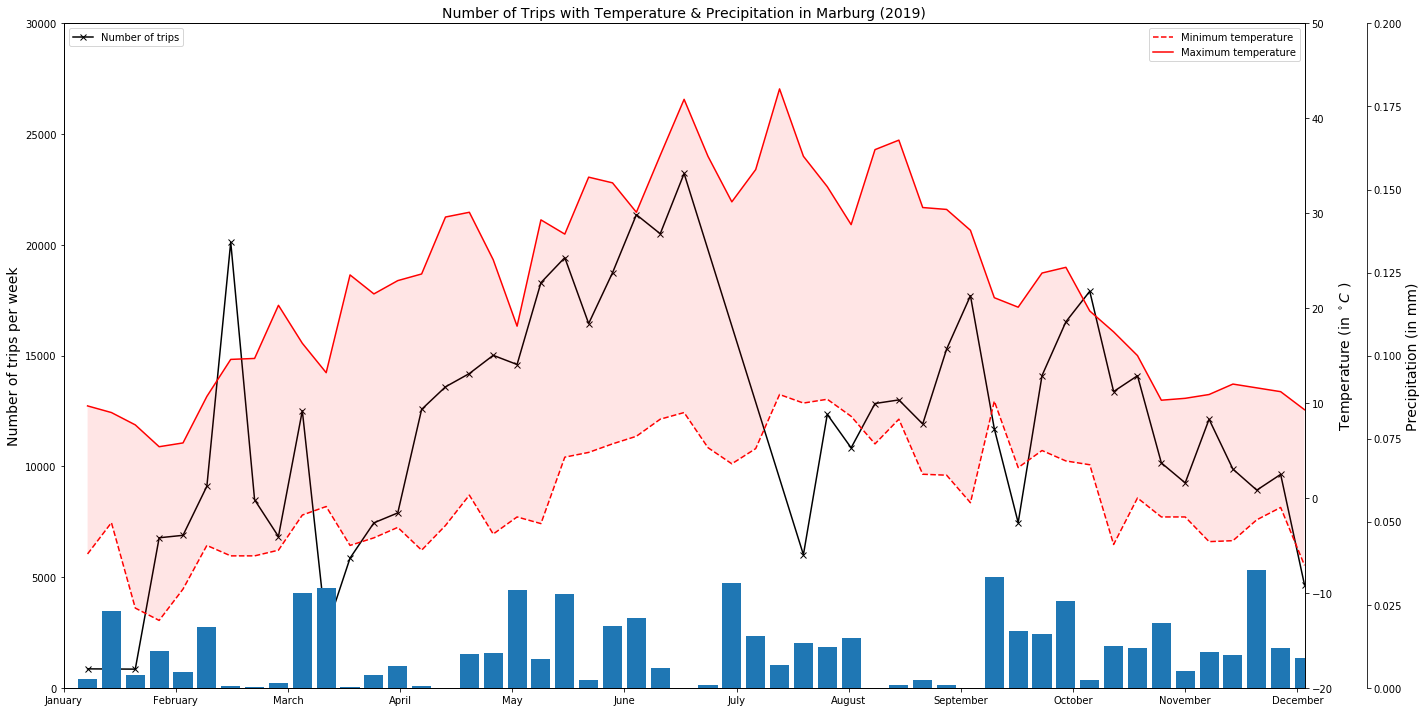

In [15]:
nextbike.visualization.visualizeNumberOfTripsWithTemperatureAndPrecipitation(dfWeather,dfTrips)

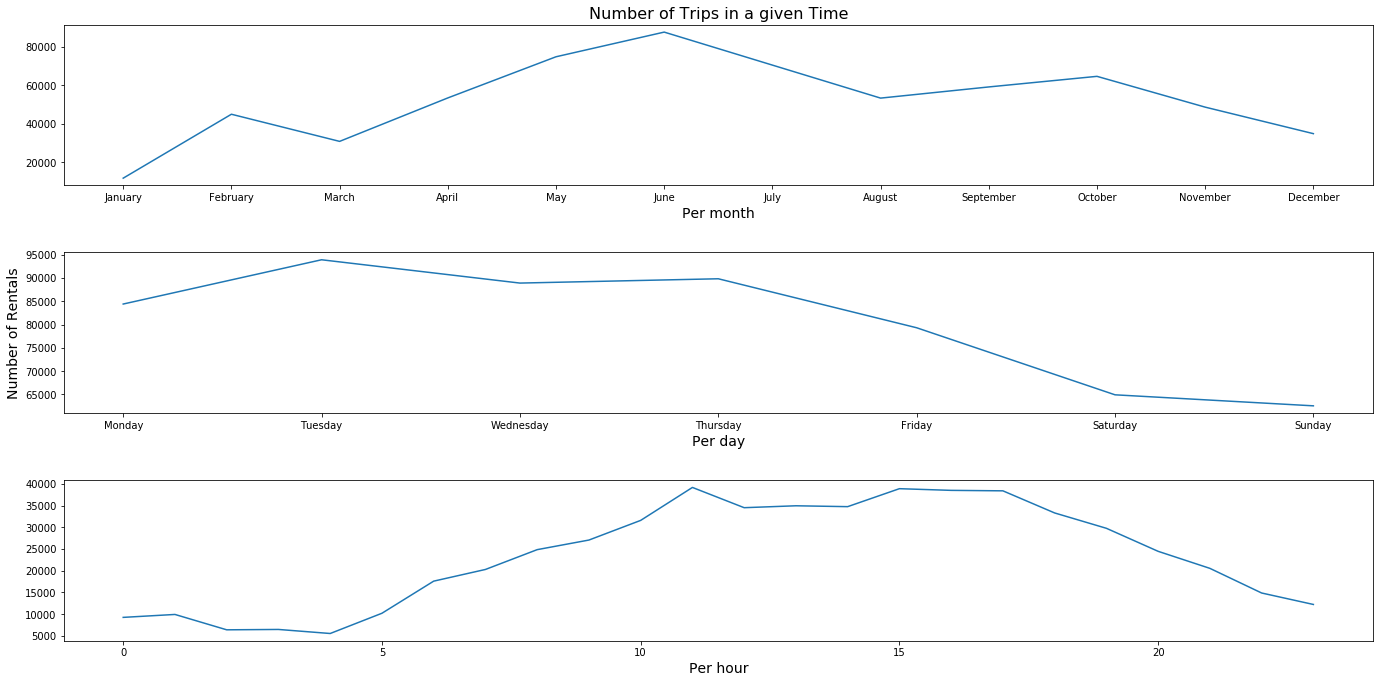

In [16]:
nextbike.visualization.visualizeNumberOfTrips(dfTrips).show()

In [17]:
nextbike.prediction.retrainModel_DurationOfTrips(dfTrips,dfWeather,False)

Test  :   MAE:  181.32716916628488 MSE:  148581.56205415615 R^2:  0.8144376117985753
Train :   MAE:  79.45386287314102 MSE:  37006.61258570089 R^2:  0.9536522273395698
Compare to prediction by average (last 6 months):   MAE:  638.9354979276239  MSE:  808677.3159030797
Compare to prediction by average (last month):   MAE:  653.9210723659543  MSE:  816439.264433162


In [19]:
nextbike.prediction.trainKNNRegression(dfTrips,dfWeather)

This can take a few minutes
              precision    recall  f1-score   support

           0       0.76      0.77      0.77     96287
           1       0.69      0.68      0.69     72877

    accuracy                           0.73    169164
   macro avg       0.73      0.73      0.73    169164
weighted avg       0.73      0.73      0.73    169164



Fitting 3 folds for each of 150 candidates, totalling 450 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   43.7s
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:   55.6s finished
Test  :   MAE:  304.7772997944663 MSE:  150694.90739000306 R^2:  0.74599617983262
Train :   MAE:  149.79731023972596 MSE:  40522.405792484176 R^2:  0.928249226577534


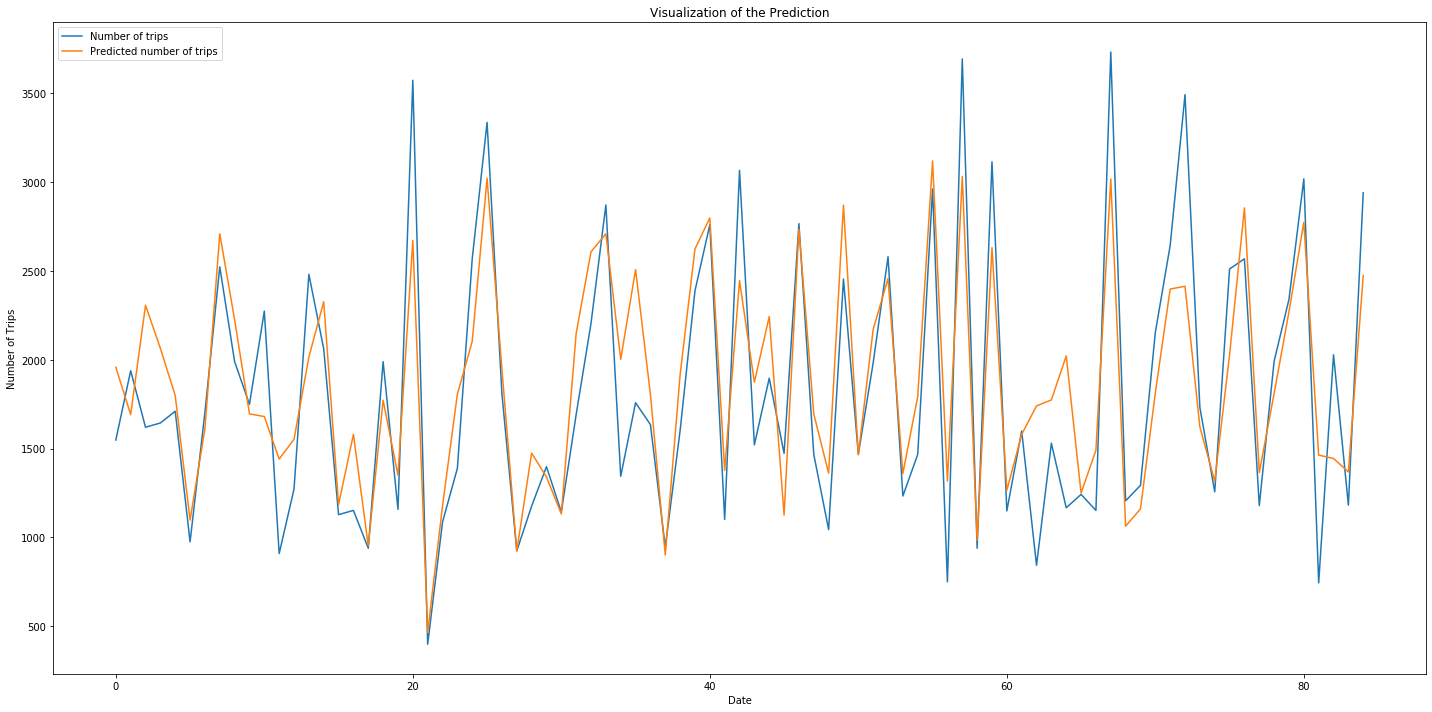

In [20]:
nextbike.prediction.retrainModel_NumberOfTrips(dfTripsPerDay,True)

Test  :   MAE:  298.5499411764703 MSE:  151437.43346918814 R^2:  0.7447446149061503
Train :   MAE:  111.36437055837533 MSE:  20926.552392045618 R^2:  0.9629465158884146


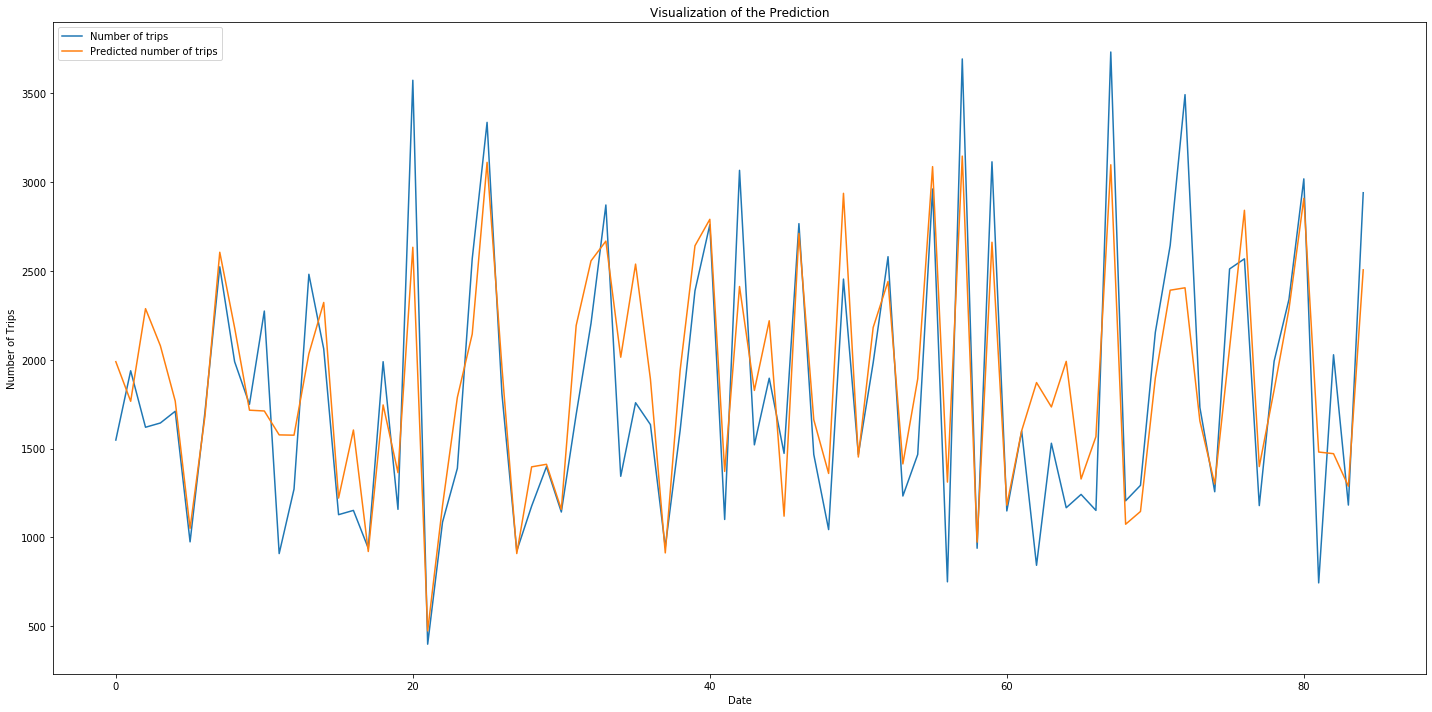

In [21]:
nextbike.prediction.retrainModel_NumberOfTrips(dfTripsPerDay,False)

In [29]:
dfRaw = nextbike.io.read_file("marburg_test.csv")
dfWeather = nextbike.io.getWeatherData()
dfRawData = nextbike.io.preprocessData(dfRaw)  
stationData = nextbike.io.preprocessStationData(dfRaw)
dfBikesPerStationIndex = nextbike.io.createBikeNumberPerStationIndex(stationData)

dfTripsRaw = nextbike.io.createTrips(dfRawData)
dfTrips = nextbike.io.drop_outliers(dfTripsRaw)
dfTrips = nextbike.postalCodes.assignPostalCode(dfTrips)
dfTrips = nextbike.postalCodes.filterForPostalCodes(dfTrips)
dfStations = nextbike.io.createStations(dfRawData)
dfTripsPerDay = nextbike.io.createTripsPerDay(dfTrips,dfWeather)

In [31]:
nextbike.prediction.predictTripDirection(dfTrips,dfWeather)

This can take a few minutes
Prediction is saved to csv --> output/DirectionOfTripsPrediction.csv
              precision    recall  f1-score   support

           0       0.56      0.58      0.57     12259
           1       0.45      0.43      0.44      9887

    accuracy                           0.51     22146
   macro avg       0.50      0.50      0.50     22146
weighted avg       0.51      0.51      0.51     22146



array([[0.6],
       [0. ],
       [0. ],
       ...,
       [1. ],
       [1. ],
       [1. ]])

In [30]:
model, sscaler, sscalerY = nextbike.prediction.loadModel_DurationOfTrips()
nextbike.prediction.predict_DurationOfTrips(dfTrips, dfWeather, model, sscaler,sscalerY)


MAE:  587.2412794518065
Compare to prediction by average (last 6 months):   MAE:  500.97751286914115  MSE:  457841.0360335952
Compare to prediction by average (last month):   MAE:  506.7190463289082  MSE:  454116.9534001626
Prediction done and saved to csv --> "output/DurationOfTripsPrediction.csv"


,bNumber,sTime,eTime,duration,sLong,sLat,eLong,eLat,weekend,bType,sPlaceNumber,ePlaceNumber,durationInSec,sPostalCode,ePostalCode
0,11234.0,2019-07-01 04:45:00,2019-07-01 05:01:00,00:16:00,8.752965,50.798656,8.769918,50.807063,False,15.0,5163,5176,960,35037,35037
1,11234.0,2019-07-01 08:37:00,2019-07-01 08:40:00,00:03:00,8.769918,50.807063,8.769918,50.807063,False,15.0,5176,5176,180,35037,35037
2,11234.0,2019-07-01 08:53:00,2019-07-01 08:58:00,00:05:00,8.769918,50.807063,8.769918,50.807063,False,15.0,5176,5176,300,35037,35037
3,11242.0,2019-07-01 06:57:00,2019-07-01 07:28:00,00:31:00,8.767953,50.778370,8.770358,50.804522,False,15.0,5154,5159,1860,35043,35037
4,11242.0,2019-07-01 07:37:00,2019-07-01 07:51:00,00:14:00,8.770358,50.804522,8.775351,50.808070,False,15.0,5159,5158,840,35037,35037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27085,11154.0,2019-07-31 09:53:00,2019-07-31 10:07:00,00:14:00,8.773736,50.819957,8.775351,50.808070,False,15.0,5165,5158,840,35039,35037
27086,11154.0,2019-07-31 10:15:00,2019-07-31 10:22:00,00:07:00,8.775351,50.808070,8.770072,50.804277,False,15.0,5158,5159,420,35037,35037
27087,11154.0,2019-07-31 11:35:00,2019-07-31 11:51:00,00:16:00,8.770072,50.804277,8.773736,50.819957,False,15.0,5159,5165,960,35037,35039
27088,11154.0,2019-07-31 11:57:00,2019-07-31 12:11:00,00:14:00,8.773736,50.819957,8.775351,50.808070,False,15.0,5165,5158,840,35039,35037


Prediction is saved to csv --> output/NumberOfTripPrediction.csv
Test  :   MAE:  317.76835483870974 MSE:  143651.63784680626 R^2:  -3.230485369817008
Compare to prediction by average (last 6 months):   MAE:  957.6129032258065  MSE:  950978.7741935484
Compare to prediction by average (last month):   MAE:  2206.6129032258063  MSE:  4903096.806451613


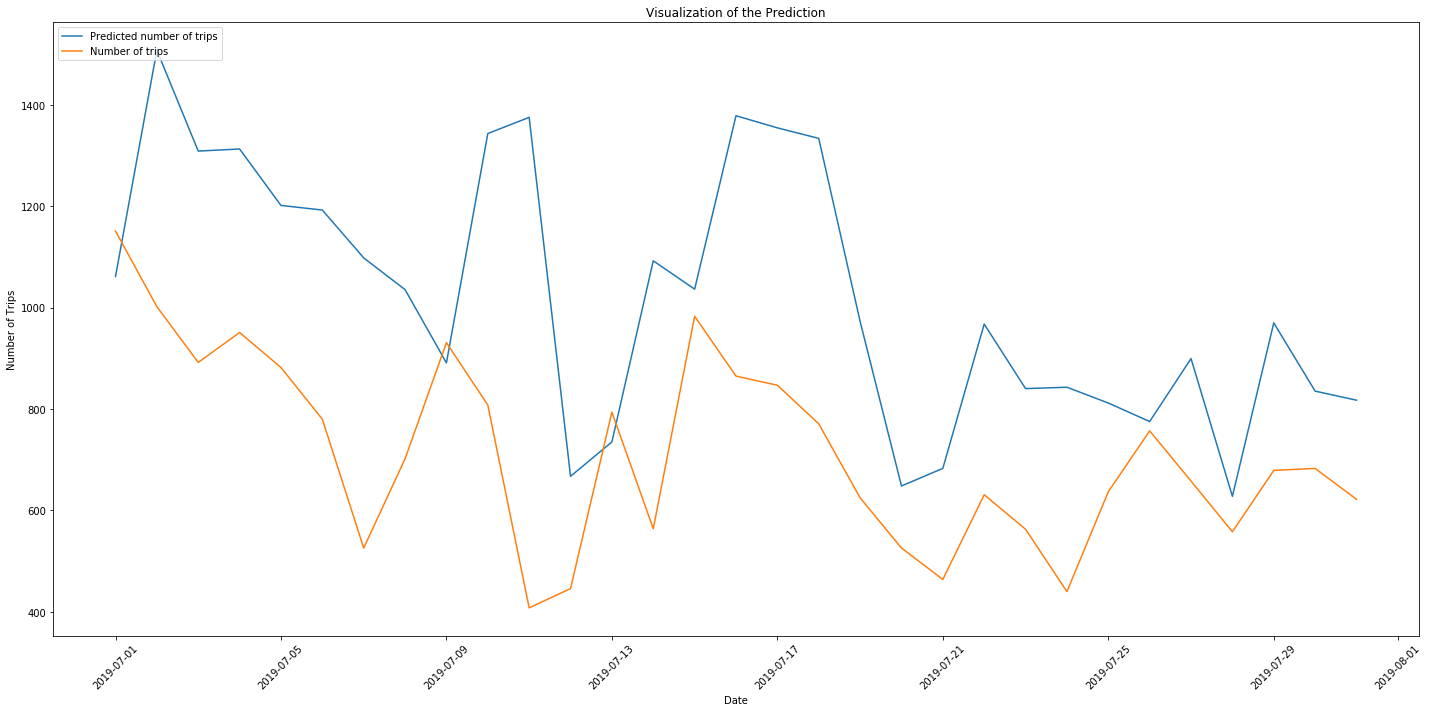

,temperatureAVG,precipitationAVG,dayOfWeek,tripsLastDay,tripsOneWeekAgo,isTerm,tripsPerDay
0,21.793056,0.006042,0,714.387097,714.387097,1,1061.490
1,18.093056,0.000000,1,1151.000000,714.387097,1,1507.623
2,17.291667,0.000000,2,1002.000000,714.387097,1,1308.780
3,18.683333,0.000000,3,892.000000,714.387097,1,1312.974
4,21.070833,0.000000,4,951.000000,714.387097,1,1201.620
5,22.963194,0.000000,5,882.000000,714.387097,1,1192.551
6,18.004861,0.000000,6,780.000000,714.387097,1,1098.195
7,14.222917,0.000000,0,526.000000,1151.000000,1,1035.546
8,13.859722,0.000000,1,702.000000,1002.000000,1,891.039
9,18.345139,0.000625,2,931.000000,892.000000,1,1343.412


In [32]:
model, sscaler, sscalerY = nextbike.prediction.loadModel_NumberOfTrips()
nextbike.prediction.predict_NumberOfTrips(dfTripsPerDay, model, sscaler,sscalerY)